In [9]:
import sys
import os
from ipywidgets import widgets, Layout, HBox, HTML
from IPython.display import display, Markdown, HTML, clear_output

%load_ext autoreload
%autoreload 2
path = os.path.abspath(".")

print(f"Project: {path}")

%env DOES_PROJECT_DIR=$path
%env DOES_PROJECT_ID_SUFFIX=ae

does_config_path = os.path.join(os.environ["DOES_PROJECT_DIR"], "doe-suite-config")

path = os.path.join(does_config_path, "does_etl_custom")
sys.path.append(path)

import doespy.etl.etl_base as etl_base

# inspect df
if etl_base.ETL_CUSTOM_PACKAGE == "does":
    print("Environment loaded successfully")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project: /home/hehuiyang/tmp/arc1
env: DOES_PROJECT_DIR=/home/hehuiyang/tmp/arc1
env: DOES_PROJECT_ID_SUFFIX=ae
Environment loaded successfully


In [2]:
from doespy.etl.etl_debug import debug_compute_input_df, debug_super_etl_step, HDict
from does_etl_custom.etl.bar_plot_loader import BarPlotLoader
from does_etl_custom.etl.sp import ActualDurationLoader

def select_exp(exp_list):
    w = widgets.Dropdown(
        options=exp_list,
        value=exp_list[0],
        description='Experiment:',
        disabled=False,
    )
    display(Markdown("### Available experiments"))
    display(w)
    return w

def set_result_path(source):
    if source == "paper":
        path = os.environ['DOES_PROJECT_DIR'] + "/doe-suite-results-cameraready"
    elif source == "docker":
        path = os.environ['DOES_PROJECT_DIR'] + "/doe-suite-results"
    else:
        raise ValueError(f"Source {source} invalid.")
    %env DOES_RESULTS_DIR=$path

In [21]:
import matplotlib.pyplot as plt
import json
import ipywidgets as widgets
from IPython.display import Javascript
from time import time
import os  # 导入 os 模块用于目录操作
import pandas as pd  # 确保 df 是 pandas DataFrame 类型

def compute_suite_id_map_available():
    results_dir = os.path.join(os.environ['DOES_PROJECT_DIR'], os.environ['DOES_RESULTS_DIR'])
    suites = os.listdir(results_dir)
    suite_split = [x.rsplit("_", 1) for x in suites]

    # Filter out invalid entries
    suite_split = [elem for elem in suite_split if len(elem) == 2 and elem[1].isdigit()]

    # Keep the most recent
    d = {}
    for suite, idx in suite_split:
        idx = int(idx)
        if suite not in d or idx > d[suite]:
            d[suite] = idx

    return HDict(d)

def output(source, super_etl, pipeline, StepCls=BarPlotLoader):

    set_result_path(source.lower())
    display(Markdown(f"#### >> {source} Results"))

    if source.lower() == "paper":
        overwrite_suite_id_map = None
    else:
        overwrite_suite_id_map = compute_suite_id_map_available()

    debug_compute_input_df.cache_clear()
    df = debug_compute_input_df(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls, overwrite_suite_id_map=overwrite_suite_id_map)

    if not df.empty:
        res = debug_super_etl_step(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls, df=df)
        plt.show()

        # 创建 output 目录
        output_dir = "output"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)  # 如果目录不存在，创建目录

        # 添加时间戳，避免文件覆盖
        timestamp = time()  # 获取当前时间戳
        timestamp_str = f"{timestamp:.0f}"  # 转换为整数字符串，避免小数点
        csv_path = os.path.join(output_dir, f"{source.lower()}_results_{timestamp_str}.csv")

        # 导出 df 为 CSV 文件
        df.to_csv(csv_path, index=False)  # 将 df 保存为 CSV 文件，不保存索引
        # print(f"DataFrame has been exported to {csv_path}")
    else:
        display(Markdown("> **does not exist yet**"))

    display(Markdown("---"))

def copy_text_button(command: str) -> widgets.Widget:
    button = widgets.Button(description=f"Copy Command", icon="copy")
    output = widgets.Output(layout=widgets.Layout(display="none"))
    copy_js = Javascript(f"navigator.clipboard.writeText({json.dumps(command)})")

    def on_click(_: widgets.Button) -> None:
        output.clear_output()
        output.append_display_data(copy_js)
    button.on_click(on_click)

    print(f"Experiment command (run in doe-suite dir): `{command}`")
    display(widgets.Box((button, output)))

**Output Verbosity**

### Plots

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'mnist', 'raw', 'table'}


processing runs of experiment wan_sh: 100%|█████████████████████| 6/6 [00:00<00:00, 20.50it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['training'], 'suite_name': ['train_3pc'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'network_type': ['lan'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'mpc.script_args.dataset': ['adult'], 'mpc.domain': ['ring']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'mpc.domain', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'group_labels': {'cols': ['consistency_args.type'], 'format': '{}'}, 'show_debug_info': False, 'figure_size': [2.5, 1.8], 'bar_width': 1, 'legend_fig': {'format': '{} {}', 'cols': ['mpc_type', '$bar_part_col$'], 'kwargs': {'loc': 'upper center', 'ncol': 4, 'bbox_to_anchor': [0.51, 0.075], 'columnspacing': 3.5, 'fancybox': True}}, 'title': {'format': '{}', 'plot_cols': ['mpc.script_args.dataset']}, 'bar_styles': [{'style':

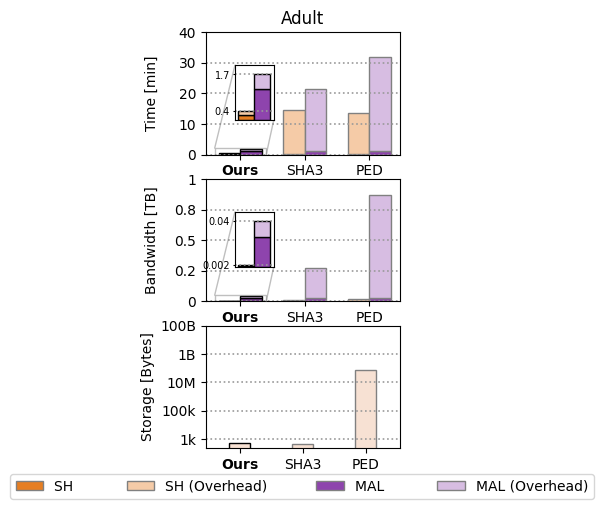

---

In [22]:
for source in ["docker"]:
    output(source, "train", "compare_relatedwork_linear")


### Plots

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'mnist', 'raw'}


processing runs of experiment wan: 100%|██████████████████████| 12/12 [00:00<00:00, 26.08it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['inference'], 'suite_name': ['inference_3pc'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'network_type': ['lan', 'wan'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc.script_args.dataset': ['adult']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'legend_fig': {'format': '{} {}', 'cols': ['mpc_type', '$bar_part_col$'], 'kwargs': {'loc': 'upper center', 'ncol': 4, 'bbox_to_anchor': [0.51, 0.075], 'columnspacing': 3.5, 'fancybox': True}}, 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#f7e1d3', 'edgecolor': 'grey', 'label': None}, 'filter': {'$bar_part_col$': ['storage_inference']}}, {'style': {'color': '#e67

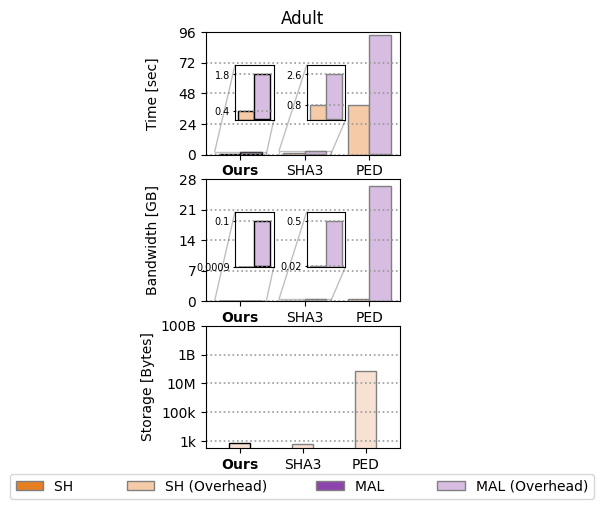

---

In [26]:
for source in ["docker"]:
    output(source, "inference", "compare_relatedwork_linear")


### Plots

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'mnist'}


processing runs of experiment audit_robustness_3pc: 100%|█████| 36/36 [00:00<00:00, 41.19it/s]
processing runs of experiment audit_robustness_3pc_wan: 100%|█| 36/36 [00:00<00:00, 41.18it/s]
processing runs of experiment audit_sample_knnshapley: 100%|██| 36/36 [00:01<00:00, 32.55it/s]
processing runs of experiment audit_sample_knnshapley_wan: 100%|█| 36/36 [00:01<00:00, 32.26it
processing runs of experiment audit_fairness_3pc: 100%|███████| 12/12 [00:00<00:00, 41.24it/s]
processing runs of experiment audit_fairness_3pc_wan: 100%|███| 12/12 [00:00<00:00, 41.81it/s]
processing runs of experiment audit_shap_wan: 100%|███████████| 12/12 [00:00<00:00, 40.18it/s]
processing runs of experiment audit_sample_knnshapley: 100%|████| 6/6 [00:00<00:00, 20.40it/s]
processing runs of experiment audit_sample_knnshapley_wan_mal: 100%|█| 1/1 [00:00<00:00, 44.32
processing runs of experiment audit_sample_knnshapley_wan_sh: 100%|█| 6/6 [00:00<00:00, 20.34i
processing runs of experiment audit_sample_knnshap

Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_name', 'mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['audit_fairness', 'audit_robustness', 'audit_prediction_shap', 'audit_sample_knnshapley'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc_type': ['sh', 'mal'], 'host_idx': [0], 'mpc.protocol_setup': ['semi_honest_3', 'sy-rep-ring-party'], 'mpc.script_args.round_nearest': [False], 'mpc.script_args.dataset': ['adult'], 'mpc.domain': ['ring_split'], 'network_type': ['lan', 'wan']}, 'plot_cols': ['host_idx', 'mpc.script_name', 'mpc.script_args.dataset', 'network_type'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#e67e22', 'edgecolor': 'grey'}, 'filter': {'mpc_type': ['sh'], '$bar_part_col$': ['mpc_time_s', 'global_data_sent_bytes']}}, {'style': {'

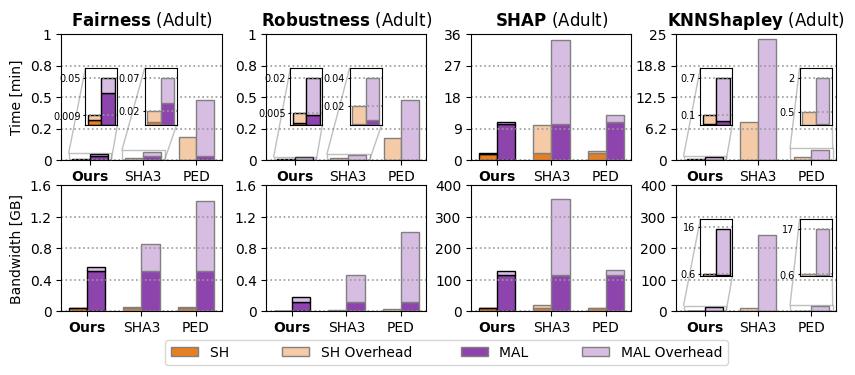

---

In [23]:
for source in ["docker"]:
    output(source, "audit", "compare_relatedwork")


### Storage Overhead
We compute the storage costs for Fig. 4 & Fig. 5 using [storage.ipynb](notebooks/storage.ipynb)
which stores the result in a csv in `doe-suite-results` which is loaded by the pipeline.


## MNIST

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'raw', 'table', 'compare_relatedwork_linear'}


processing runs of experiment wan: 100%|██████████████████████| 36/36 [00:01<00:00, 29.67it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['training'], 'suite_name': ['train_3pc'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'network_type': ['lan'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'mpc.script_args.dataset': ['mnist_full'], 'mpc.domain': ['ring']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'mpc.domain', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'group_labels': {'cols': ['consistency_args.type'], 'format': '{}'}, 'show_debug_info': False, 'figure_size': [2.5, 1.8], 'bar_width': 1, 'legend_fig': {'format': '{} {}', 'cols': ['mpc_type', '$bar_part_col$'], 'kwargs': {'loc': 'upper center', 'ncol': 2, 'bbox_to_anchor': [0.51, 0.075], 'columnspacing': 3.5, 'fancybox': True}}, 'title': {'format': '{}', 'plot_cols': ['mpc.script_args.dataset']}, 'bar_styles': [{'st

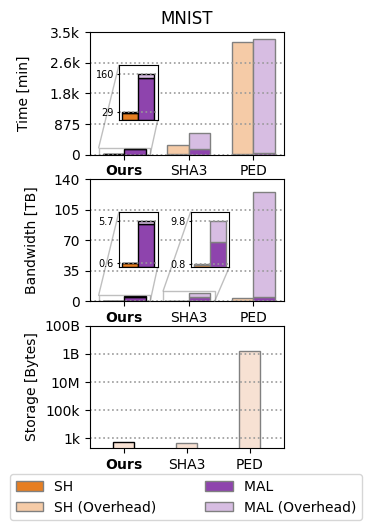

---

In [24]:
for source in ["docker"]:
    output(source, "train", "mnist")

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'raw', 'compare_relatedwork_linear'}


processing runs of experiment wan: 100%|██████████████████████| 36/36 [00:00<00:00, 39.17it/s]


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['inference'], 'suite_name': ['inference_3pc', 'inference_3pc_wan', 'inference_3pc_bert'], 'host_idx': [0], 'mpc_type': ['sh', 'mal'], 'network_type': ['lan', 'wan'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc.script_args.dataset': ['mnist_full']}, 'plot_cols': ['suite_name', 'mpc.script_name', 'host_idx', 'network_type', 'mpc.script_args.dataset'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#f7e1d3', 'edgecolor': 'grey', 'label': None}, 'filter': {'$bar_part_col$': ['storage_inference']}}, {'style': {'color': '#e67e22', 'edgecolor': 'grey'}, 'filter': {'mpc_type': ['sh'], '$bar_part_col$': ['mpc_time_s', 'global_data_sent_bytes']}}, {'style': {'color': '#f5c

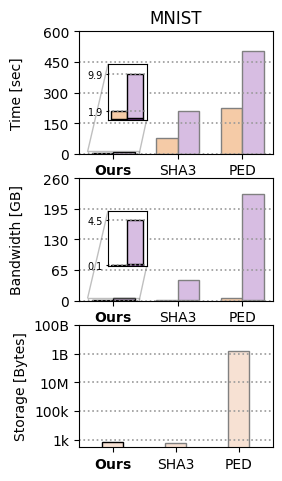

---

In [27]:
for source in ["docker"]:
    output(source, "inference", "mnist")

env: DOES_RESULTS_DIR=/home/hehuiyang/tmp/arc1/doe-suite-results


#### >> docker Results

Replacing suite id map in super etl design: {'train_3pc_bert_wan': 1717160273, 'audit_fairness': 1745376941, 'inference_3pc_wan': 1705947503, 'inference_3pc': 1705933736, 'audit_knnshapley_wan': 1705958533, 'audit_fairness_wan': 1705955928, 'audit_shap_wan': 1705959794, 'audit_knnshapley_bert_mal': 1717593653, 'train_3pc': 1705937567, 'audit_robustness_wan': 1705960388, 'train_3pc_bert': 1717166233, 'audit_knnshapley': 1705957720, 'audit_knnshapley_bert_wan': 1717156384, 'audit_robustness': 1705955178, 'audit_shap': 1705957649, 'audit_knnshapley_bert': 1717158669, 'inference_3pc_bert_wan': 1716810960, 'train_3pc_wan': 1705939961, 'inference_3pc_bert': 1716825542}
Filtering our pipelines: {'compare_relatedwork'}


processing runs of experiment audit_robustness_3pc: 100%|█████| 36/36 [00:00<00:00, 40.99it/s]
processing runs of experiment audit_robustness_3pc_wan: 100%|█| 36/36 [00:00<00:00, 41.14it/s]
processing runs of experiment audit_sample_knnshapley: 100%|██| 36/36 [00:01<00:00, 32.80it/s]
processing runs of experiment audit_sample_knnshapley_wan: 100%|█| 36/36 [00:01<00:00, 32.47it


Config=cfg={'subplots': {'rows': ['$metrics$', 'network_type'], 'cols': ['mpc.script_name', 'mpc.script_args.dataset'], 'share_y': 'none'}, 'cols_values_filter': {'mpc.script_name': ['audit_fairness', 'audit_robustness', 'audit_prediction_shap', 'audit_sample_knnshapley'], 'consistency_args.type': ['pc', 'sha3s', 'cerebro'], 'mpc_type': ['sh', 'mal'], 'host_idx': [0], 'mpc.protocol_setup': ['semi_honest_3', 'sy-rep-ring-party'], 'mpc.script_args.round_nearest': [False], 'mpc.script_args.dataset': ['mnist_full'], 'mpc.domain': ['ring_split'], 'network_type': ['lan', 'wan']}, 'plot_cols': ['host_idx', 'mpc.script_name', 'mpc.script_args.dataset', 'network_type'], 'group_cols': ['consistency_args.type'], 'bar_cols': ['mpc_type'], 'bar_styles': [{'style': {'label': None, 'edgecolor': 'black'}, 'filter': {'consistency_args.type': ['pc']}}, {'style': {'color': '#e67e22', 'edgecolor': 'grey'}, 'filter': {'mpc_type': ['sh'], '$bar_part_col$': ['mpc_time_s', 'global_data_sent_bytes']}}, {'style

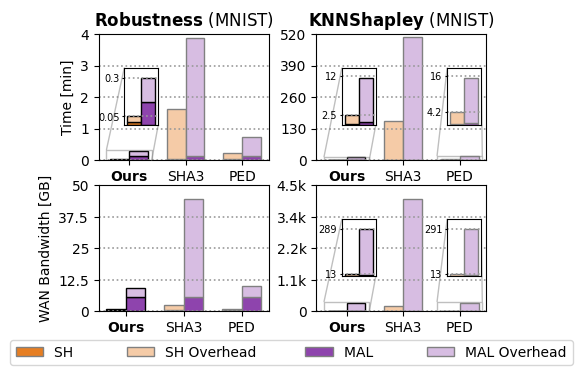

---

In [25]:
for source in ["docker"]:
    output(source, "audit", "mnist")